# Investigating the new graphstructures

In [4]:
import os
# set the directory to the root
os.chdir("/Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt")
from graphs.graph_4_nodes import Graph4Nodes
from graphs.graph_5_nodes import Graph5Nodes
from graphs.graph_6_nodes import Graph6Nodes
from algorithms.CEO_algorithm import CEO

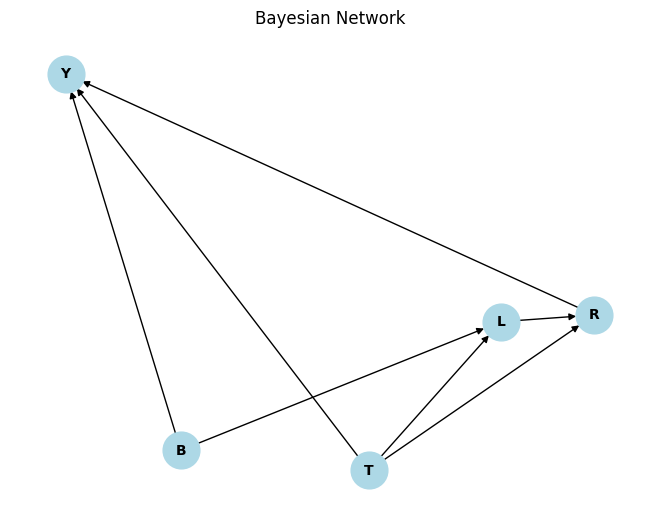

{'compute_do_T': <bound method Graph5Nodes.compute_do_T of <graphs.graph_5_nodes.Graph5Nodes object at 0x3216ce5f0>>,
 'compute_do_R': <bound method Graph5Nodes.compute_do_R of <graphs.graph_5_nodes.Graph5Nodes object at 0x3216ce5f0>>,
 'compute_do_RT': <bound method Graph5Nodes.compute_do_TR of <graphs.graph_5_nodes.Graph5Nodes object at 0x3216ce5f0>>}

In [5]:
graph = Graph5Nodes()
graph.show_graphical_model()
graph.get_all_do()

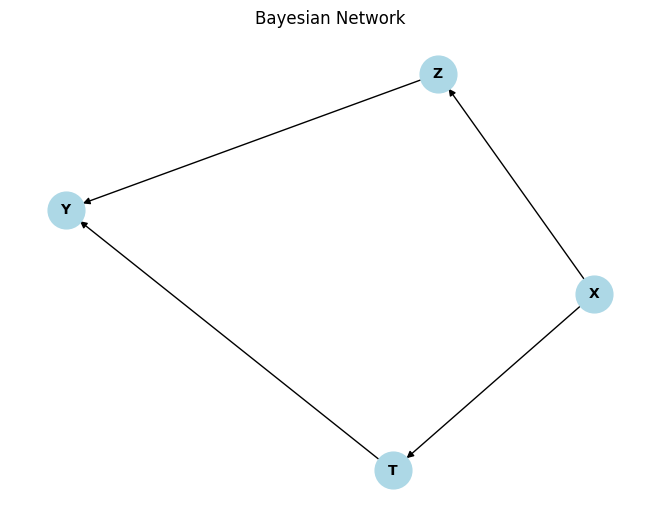

{'compute_do_X': <bound method Graph4Nodes.compute_do_X of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>,
 'compute_do_Z': <bound method Graph4Nodes.compute_do_Z of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>,
 'compute_do_T': <bound method Graph4Nodes.compute_do_T of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>,
 'compute_do_XZ': <bound method Graph4Nodes.compute_do_XZ of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>,
 'compute_do_XT': <bound method Graph4Nodes.compute_do_XT of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>,
 'compute_do_ZT': <bound method Graph4Nodes.compute_do_ZT of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>,
 'compute_do_XZT': <bound method Graph4Nodes.compute_do_XZT of <graphs.graph_4_nodes.Graph4Nodes object at 0x3216a6c50>>}

In [6]:
graph = Graph4Nodes()
graph.show_graphical_model()
graph.get_all_do()

# The Toy Graph example

INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the toy graph
INFO:root:Initializing the Toy Graph Structures
INFO:root:Getting the variables (mis and pomis) for the CBO algorithm
INFO:root:The exploration set in this setup is [('X',), ('Z',)]
INFO:root:Using the fixed equal cost structure
INFO:root:---Fitting samples for graph 0---
INFO:root:Fitting child: Y to parents: ['Z'] for [('Z', 'X'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


[{'X': -5.0}, {'X': -4.473684210526316}, {'X': -3.947368421052632}, {'X': -3.4210526315789473}, {'X': -2.8947368421052633}, {'X': -2.368421052631579}, {'X': -1.8421052631578947}, {'X': -1.3157894736842106}, {'X': -0.7894736842105265}, {'X': -0.2631578947368425}, {'X': 0.2631578947368416}, {'X': 0.7894736842105257}, {'X': 1.3157894736842106}, {'X': 1.8421052631578947}, {'X': 2.3684210526315788}, {'X': 2.894736842105263}, {'X': 3.421052631578947}, {'X': 3.947368421052632}, {'X': 4.473684210526315}, {'X': 5.0}, {'Z': -5.0}, {'Z': -3.6842105263157894}, {'Z': -2.3684210526315788}, {'Z': -1.0526315789473681}, {'Z': 0.2631578947368425}, {'Z': 1.578947368421053}, {'Z': 2.8947368421052637}, {'Z': 4.210526315789474}, {'Z': 5.526315789473685}, {'Z': 6.842105263157896}, {'Z': 8.157894736842106}, {'Z': 9.473684210526317}, {'Z': 10.789473684210527}, {'Z': 12.10526315789474}, {'Z': 13.421052631578949}, {'Z': 14.736842105263158}, {'Z': 16.05263157894737}, {'Z': 17.368421052631582}, {'Z': 18.6842105263

INFO:root:Fitting child: X to parents: ['Z'] for [('Z', 'X'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 1---
INFO:root:Fitting child: Y to parents: ['X'] for [('X', 'Z'), ('X', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'Z'), ('X', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 2---
INFO:root:Fitting child: Y to parents: ['X', 'Z'] for [('X', 'Z'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'Z'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO

------CALCULATING THE DO STATISTICS--------


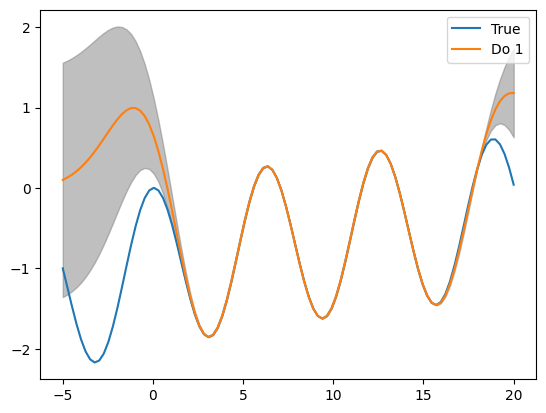

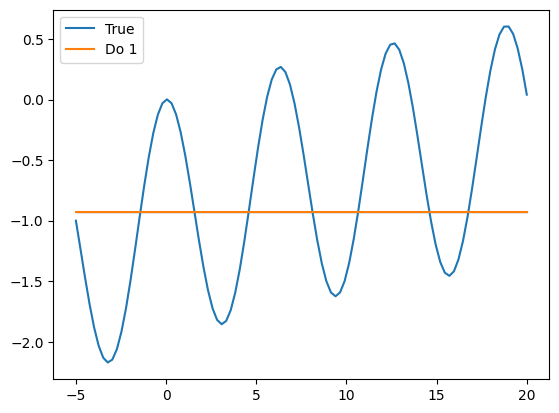

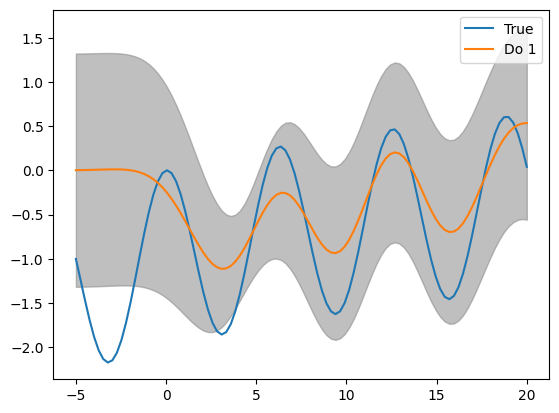

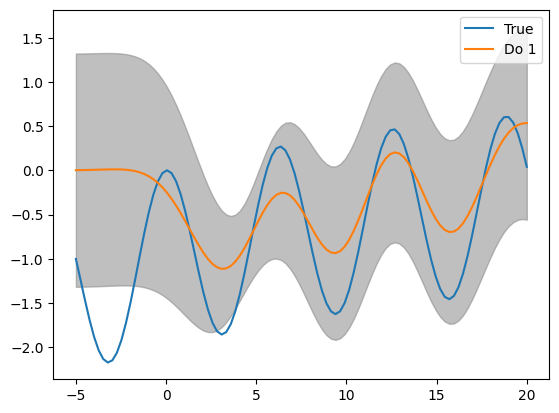

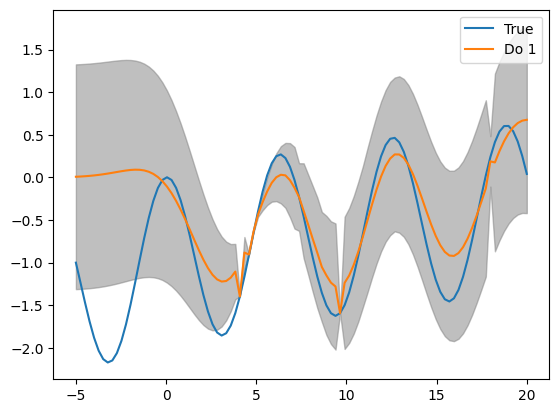

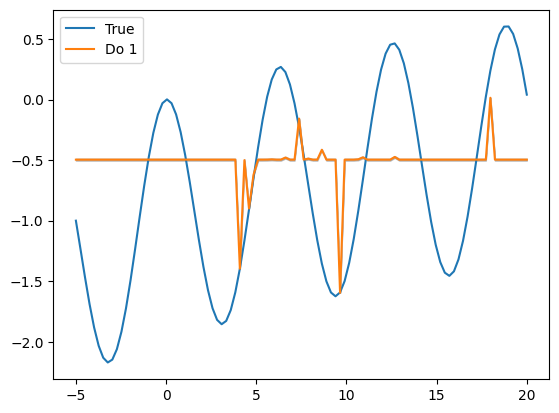

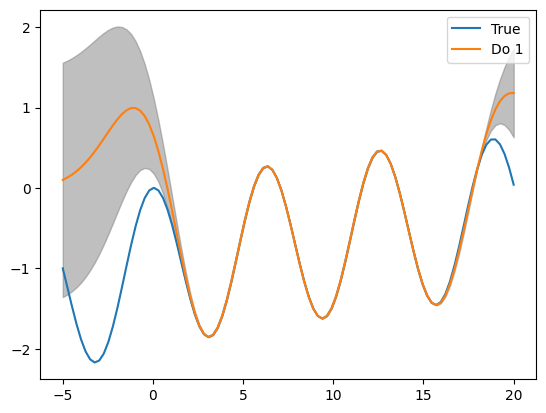

In [7]:
# will check things on an individual level to make sure the results are right
import numpy as np
import matplotlib.pyplot as plt

edges = [
            [("Z", "X"), ("Z", "Y")],
            [("X", "Z"), ("X", "Y")],
            [("X", "Z"), ("X", "Y"), ("Z", "Y")],
            [("X", "Y"), ("Z", "Y")],
            [("Z", "X"), ("Z", "Y"), ("X", "Y")],
            [("Z", "X"), ("X", "Y")],
            [("X", "Z"), ("Z", "Y")],
        ]
model = CEO(graph_type="Toy", all_graph_edges=edges)
print("------FITTING THE SAMPLES TO THE GRAPHS--------")
model.fit_samples_to_graphs()
print("------CALCULATING THE DO STATISTICS--------")
model.calculate_do_statistics()

es = model.exploration_set[1]
# print(model.exploration_set[0])
model.do_function_graph(es, edge_num=0)
model.do_function_graph(es, edge_num=1)
model.do_function_graph(es, edge_num=2)
model.do_function_graph(es, edge_num=3)
model.do_function_graph(es, edge_num=4)
model.do_function_graph(es, edge_num=5)
model.do_function_graph(es, edge_num=6)

In [8]:
model.run_algorithm(T=2, safe_optimization=True)

INFO:root:---Fitting samples for graph 0---
INFO:root:Fitting child: Y to parents: ['Z'] for [('Z', 'X'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: X to parents: ['Z'] for [('Z', 'X'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 1---
INFO:root:Fitting child: Y to parents: ['X'] for [('X', 'Z'), ('X', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'Z'), ('X', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 2---
INFO:root:Fitting child: Y to parents: ['X', 'Z'] for [('X', 'Z'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:in

Optimization restart 1/5, f = 1.7712384848378935
Optimization restart 2/5, f = 1.725128601202015
Optimization restart 3/5, f = 1.7249614291798825
Optimization restart 4/5, f = 1.7251301927422986


INFO:root:Updating posterior for ('Z',)
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/5, f = 1.725092824200576
Optimization restart 1/5, f = 3.284535193119031
Optimization restart 2/5, f = 3.285450901223075
Optimization restart 3/5, f = 3.2845314467684092
Optimization restart 4/5, f = 3.2845745355352998


INFO:root:----------------ITERATION 1----------------
INFO:root:Current posterior [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714], 1.0000000000000002
INFO:root:Updating the models based on the previous observed samples
INFO:root:Updating posterior for ('X',)
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/5, f = 3.2845414519820064
Optimization restart 1/5, f = 1.7712384848378935
Optimization restart 2/5, f = 1.7251348845377983
Optimization restart 3/5, f = 1.7249599008025953
Optimization restart 4/5, f = 1.7250841709617273


INFO:root:Updating posterior for ('Z',)
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/5, f = 1.7251458866795724
Optimization restart 1/5, f = 3.284535193119031
Optimization restart 2/5, f = 3.284534853660712
Optimization restart 3/5, f = 3.2845337602383458


INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:Now setting up the arm distribution
INFO:root:Building the py star


Optimization restart 4/5, f = 3.2845464858360973
Optimization restart 5/5, f = 3.2845325683048383
[-0.6431609  -1.98496011]
Start of loop
End of loop
Start of loop


INFO:root:Building the global py star
INFO:root:Fitting the global KDE estimate
INFO:root:Starting with the entropy search
INFO:root:Starting the optimization for CES
INFO:root:graph is not found


End of loop
[[-1.75869828 -1.6290631  -2.08836595 -2.22905524 -1.88047077 -1.8650682
  -2.11327068 -1.72187982 -1.91408101 -2.1555405  -1.78010552 -2.35959857
  -2.10773385 -1.77335068 -1.98236737 -2.21396533 -1.72865598 -2.10175711
  -2.1006307  -2.13815911 -1.72338564 -1.95055335 -1.91010101 -1.60258738
  -2.0429828  -2.03227368 -1.95447061 -2.05027801 -2.07967995 -2.1319925
  -2.04380835 -1.81348514 -2.04942389 -1.9233943  -1.66878524 -1.92922901
  -1.71950662 -1.76691149 -2.09992989 -1.85559451 -1.80867665 -1.49414644
  -1.88332652 -1.92715569 -1.93275255 -2.20795535 -2.04263549 -1.69477683
  -1.99453418 -2.24771122 -1.78521812 -1.76774783 -1.96173339 -1.74251998
  -1.89858469 -1.74060234 -1.69490795 -1.86517714 -1.88229948 -2.20243357
  -1.9894947  -1.63945342 -1.98108017 -1.87290583 -1.87529614 -2.17008233
  -1.87871616 -1.8670597  -1.64824646 -1.88589468 -1.90981831 -1.86767659
  -1.99476666 -1.6843975  -1.95945148 -1.78321739 -2.11561544 -1.87172685
  -1.80604924 -1.79218729 -1

10it [00:00, 98.60it/s] /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/likelihoods/gaussian.py:334: RuntimeWarning:invalid value encountered in log
 /Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt/ceo_venv/lib/python3.10/site-packages/GPy/likelihoods/gaussian.py:334: RuntimeWarning:overflow encountered in divide
30it [00:00, 106.31it/s]
30it [01:49,  3.64s/it]
INFO:root:Entropy changes for ('X',): 
INFO:root:[0.9269321554325795, 0.898668213147357, 0.909558988182592, 0.9125993433264701, 0.9373767524897412, 0.9125927940079689, 0.8810329717129121, 0.8930796128229561, 0.907657589864429, 0.891358302748114, nan, 0.897600707013101, 0.9121028028405896, 0.8782100165487835, 0.9009852114483253, 0.9231246494908478, 0.9018193791643425, 0.8748332372930239, 0.9067438419937707, nan, nan, 0.9148011958289677, 0.9166069452796237, 0.9154034783651722, nan, nan, 0.8907296309071849, nan, nan, nan]
INFO:root:Starting the optimization for CES
I

[0.92693216 0.89866821 0.90955899 0.91259934 0.93737675 0.91259279
 0.88103297 0.89307961 0.90765759 0.8913583         nan 0.89760071
 0.9121028  0.87821002 0.90098521 0.92312465 0.90181938 0.87483324
 0.90674384        nan        nan 0.9148012  0.91660695 0.91540348
        nan        nan 0.89072963        nan        nan        nan]


30it [00:00, 81.45it/s]
30it [01:45,  3.50s/it]
INFO:root:Entropy changes for ('Z',): 
INFO:root:[0.624161129369146, 0.6228584141057604, 0.6121107123500333, 0.6442014883059711, 0.6248240879628507, 0.6192196501718743, 0.6253204612363175, 0.6187451825359668, 0.6953134689056037, 1.188566327054678, 1.1547403844169992, 1.108796645059349, 1.1156361730100448, 1.1593302389471551, 1.1314449378182507, 1.5169362241083468, 1.1445433656573747, 1.1455078668955205, 1.1230026137886964, 1.128343031407384, 1.1390552075303635, 1.1371662068867643, 1.1198696430122443, 1.1315848309351662, 1.1398469758107432, 1.0421036625924855, 0.7051522972114922, 1.130853275823752, 0.6312007732227974, 0.6119157476353956]
INFO:root:The acquisition is [array([[nan]]), array([[1.51693622]])]
INFO:root:The corresponding x value is [array([[-1.55172414]]), array([[7.93103448]])]
INFO:root:CEO found ('X',) as the best variable with value [[-1.55172414]] and corresponding y [-1.40812713]


[0.62416113 0.62285841 0.61211071 0.64420149 0.62482409 0.61921965
 0.62532046 0.61874518 0.69531347 1.18856633 1.15474038 1.10879665
 1.11563617 1.15933024 1.13144494 1.51693622 1.14454337 1.14550787
 1.12300261 1.12834303 1.13905521 1.13716621 1.11986964 1.13158483
 1.13984698 1.04210366 0.7051523  1.13085328 0.63120077 0.61191575]


# Looking at it without the safe optimization flag on

In [9]:
import os
# set the directory to the root
os.chdir("/Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt")
from graphs.graph_4_nodes import Graph4Nodes
from graphs.graph_5_nodes import Graph5Nodes
from graphs.graph_6_nodes import Graph6Nodes
from algorithms.CEO_algorithm import CEO

edges = [
            [("Z", "X"), ("Z", "Y")],
            [("X", "Z"), ("X", "Y")],
            [("X", "Z"), ("X", "Y"), ("Z", "Y")],
            [("X", "Y"), ("Z", "Y")],
            [("Z", "X"), ("Z", "Y"), ("X", "Y")],
            [("Z", "X"), ("X", "Y")],
            [("X", "Z"), ("Z", "Y")],
        ]
model = CEO(graph_type="Toy", all_graph_edges=edges)
model.run_algorithm(T=2)


INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the toy graph
INFO:root:Initializing the Toy Graph Structures
INFO:root:Getting the variables (mis and pomis) for the CBO algorithm
INFO:root:The exploration set in this setup is [('X',), ('Z',)]
INFO:root:Using the fixed equal cost structure
INFO:root:---Fitting samples for graph 0---
INFO:root:Fitting child: Y to parents: ['Z'] for [('Z', 'X'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


[{'X': -5.0}, {'X': -4.473684210526316}, {'X': -3.947368421052632}, {'X': -3.4210526315789473}, {'X': -2.8947368421052633}, {'X': -2.368421052631579}, {'X': -1.8421052631578947}, {'X': -1.3157894736842106}, {'X': -0.7894736842105265}, {'X': -0.2631578947368425}, {'X': 0.2631578947368416}, {'X': 0.7894736842105257}, {'X': 1.3157894736842106}, {'X': 1.8421052631578947}, {'X': 2.3684210526315788}, {'X': 2.894736842105263}, {'X': 3.421052631578947}, {'X': 3.947368421052632}, {'X': 4.473684210526315}, {'X': 5.0}, {'Z': -5.0}, {'Z': -3.6842105263157894}, {'Z': -2.3684210526315788}, {'Z': -1.0526315789473681}, {'Z': 0.2631578947368425}, {'Z': 1.578947368421053}, {'Z': 2.8947368421052637}, {'Z': 4.210526315789474}, {'Z': 5.526315789473685}, {'Z': 6.842105263157896}, {'Z': 8.157894736842106}, {'Z': 9.473684210526317}, {'Z': 10.789473684210527}, {'Z': 12.10526315789474}, {'Z': 13.421052631578949}, {'Z': 14.736842105263158}, {'Z': 16.05263157894737}, {'Z': 17.368421052631582}, {'Z': 18.6842105263

INFO:root:Fitting child: X to parents: ['Z'] for [('Z', 'X'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 1---
INFO:root:Fitting child: Y to parents: ['X'] for [('X', 'Z'), ('X', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'Z'), ('X', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 2---
INFO:root:Fitting child: Y to parents: ['X', 'Z'] for [('X', 'Z'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Z to parents: ['X'] for [('X', 'Z'), ('X', 'Y'), ('Z', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO

Optimization restart 1/5, f = 2.2146329230499124
Optimization restart 2/5, f = 2.1665703938893714
Optimization restart 3/5, f = 2.166773417269096
Optimization restart 4/5, f = 2.166741555805964
Optimization restart 5/5, f = 2.167281171343261


INFO:root:Updating posterior for ('Z',)
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/5, f = 3.2620266108984355


INFO:root:----------------ITERATION 1----------------
INFO:root:Current posterior [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714], 1.0000000000000002
INFO:root:Updating the models based on the previous observed samples
INFO:root:Updating posterior for ('X',)
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 2/5, f = 3.26189443788717
Optimization restart 3/5, f = 3.261904093520407
Optimization restart 4/5, f = 3.2619018286412333
Optimization restart 5/5, f = 3.261894416365683
Optimization restart 1/5, f = 2.2146329230499124
Optimization restart 2/5, f = 2.1669087505909967
Optimization restart 3/5, f = 2.1666517187757437
Optimization restart 4/5, f = 2.166847083324679


INFO:root:Updating posterior for ('Z',)
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/5, f = 2.1666656805743507
Optimization restart 1/5, f = 3.2620266108984355
Optimization restart 2/5, f = 3.261903714765989
Optimization restart 3/5, f = 3.2619115442449296
Optimization restart 4/5, f = 3.2619119859805537


INFO:root:Now setting up the arm distribution
INFO:root:Building the py star


Optimization restart 5/5, f = 3.2618952452844603
[-0.50862266 -1.77520271]
Start of loop
End of loop
Start of loop


INFO:root:Building the global py star
INFO:root:Fitting the global KDE estimate
INFO:root:Starting with the entropy search
INFO:root:Starting the optimization for CES
INFO:root:graph is not found


End of loop
[[-1.79089437 -2.42028828 -2.77711373 -2.38021844 -2.12970597 -2.23395519
  -1.93770622 -2.01855392 -1.52120445 -2.2517993  -2.54989006 -2.75700708
  -2.21433309 -1.88815069 -1.90490962 -2.27009189 -1.80228914 -2.38329262
  -1.98253818 -2.11476047 -2.14596302 -1.92047149 -1.71825795 -1.34447614
  -1.90615616 -1.95889829 -1.76179923 -1.99472783 -2.11627851 -1.91712004
  -1.73431745 -1.76040254 -2.0235658  -1.80559759 -1.97310955 -2.08204326
  -2.62461957 -1.81480354 -2.18584201 -2.08285205 -1.80354614 -2.29272462
  -1.71264556 -2.04841303 -1.83313676 -2.13516418 -2.5651668  -2.01149845
  -1.94934763 -2.59888185 -1.78666379 -2.38364796 -2.50383987 -1.87055004
  -1.88099616 -1.6983155  -1.74847888 -2.21845356 -2.37429662 -1.63209362
  -1.7188814  -2.93145633 -2.37551864 -1.90870979 -1.41738498 -1.92672986
  -1.58587368 -2.34611174 -1.75096127 -2.05701984 -1.70268913 -2.3271875
  -1.8143048  -2.32585581 -1.53837169 -2.40083367 -1.87369622 -2.20875834
  -2.74745435 -2.39951037 -

30it [00:00, 107.91it/s]
30it [01:34,  3.15s/it]
INFO:root:Entropy changes for ('X',): 
INFO:root:[0.4767695416587461, nan, 0.47830762934335036, 0.48979384518813984, 0.5168336071505562, 0.5455851270812462, 1.873538121418671, 0.4880839994999271, 1.8574554962463643, 1.8578237105255129, 1.8644744838921814, 1.862771935615813, 1.8989004573335473, 1.8541209830096537, 1.8576382169275525, 1.8367254293063588, 1.8546682216399366, 1.8786273019172735, 1.892460855115629, 1.886276988061111, 1.8675449987843793, 1.8784888719506379, 1.882131769241538, 1.87543217007377, 1.8551950888189612, 1.8636409327497596, 1.8722579098777516, 1.875732255326594, 1.8785668359952132, 1.8760595164573233]
INFO:root:Starting the optimization for CES
INFO:root:graph is not found


[0.47676954        nan 0.47830763 0.48979385 0.51683361 0.54558513
 1.87353812 0.488084   1.8574555  1.85782371 1.86447448 1.86277194
 1.89890046 1.85412098 1.85763822 1.83672543 1.85466822 1.8786273
 1.89246086 1.88627699 1.867545   1.87848887 1.88213177 1.87543217
 1.85519509 1.86364093 1.87225791 1.87573226 1.87856684 1.87605952]


30it [00:00, 78.60it/s]
30it [01:34,  3.16s/it]
INFO:root:Entropy changes for ('Z',): 
INFO:root:[0.36800570840104163, 0.3718773564449068, 0.33215567332411944, 0.3615208940233412, 0.3847117569098717, 0.34579623446610597, 0.3587795602275543, 0.35656529959246885, 0.5622836763853274, 0.7190998146316813, 0.6452264851476284, 0.7223937219318717, 0.7013476116566084, 0.6826762239167171, 2.280121369951044, 0.6867223083106991, 0.7296902124055313, 0.7074145226131627, 0.7090564152330936, 0.6990520469834499, 0.6960099900267024, 0.6869195369620923, 0.7215522717439643, 0.6746644986251918, 0.693429917845341, 0.35312400403821975, 0.3771578691835026, 0.6889256651420699, 0.6922167956219694, 0.6577537164708703]
INFO:root:The acquisition is [array([[nan]]), array([[2.28012137]])]
INFO:root:The corresponding x value is [array([[-4.65517241]]), array([[7.06896552]])]
INFO:root:CEO found ('X',) as the best variable with value [[-4.65517241]] and corresponding y [-0.68032533]


[0.36800571 0.37187736 0.33215567 0.36152089 0.38471176 0.34579623
 0.35877956 0.3565653  0.56228368 0.71909981 0.64522649 0.72239372
 0.70134761 0.68267622 2.28012137 0.68672231 0.72969021 0.70741452
 0.70905642 0.69905205 0.69600999 0.68691954 0.72155227 0.6746645
 0.69342992 0.353124   0.37715787 0.68892567 0.6922168  0.65775372]


# The 6 nodes graph example

INFO:root:Setting up the 5 nodes graph
INFO:root:The exploration set in this setup is [('R',), ('T',), ('R', 'T')]
INFO:root:Using the fixed equal cost structure
INFO:root:---Fitting samples for graph 0---
INFO:root:Fitting child: L to parents: ['B', 'T'] for [('B', 'L'), ('B', 'Y'), ('T', 'L'), ('T', 'R'), ('T', 'Y'), ('L', 'R'), ('R', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


[{'R': 5.0}, {'R': 5.526315789473684}, {'R': 6.052631578947368}, {'R': 6.578947368421053}, {'R': 7.105263157894736}, {'R': 7.631578947368421}, {'R': 8.157894736842106}, {'R': 8.68421052631579}, {'R': 9.210526315789473}, {'R': 9.736842105263158}, {'R': 10.263157894736842}, {'R': 10.789473684210526}, {'R': 11.31578947368421}, {'R': 11.842105263157894}, {'R': 12.368421052631579}, {'R': 12.894736842105264}, {'R': 13.421052631578947}, {'R': 13.947368421052632}, {'R': 14.473684210526315}, {'R': 15.0}, {'T': 4.0}, {'T': 4.2105263157894735}, {'T': 4.421052631578947}, {'T': 4.631578947368421}, {'T': 4.842105263157895}, {'T': 5.052631578947368}, {'T': 5.2631578947368425}, {'T': 5.473684210526316}, {'T': 5.684210526315789}, {'T': 5.894736842105263}, {'T': 6.105263157894736}, {'T': 6.315789473684211}, {'T': 6.526315789473684}, {'T': 6.7368421052631575}, {'T': 6.947368421052632}, {'T': 7.157894736842105}, {'T': 7.368421052631579}, {'T': 7.578947368421052}, {'T': 7.789473684210526}, {'T': 8.0}, {'R'

INFO:root:Fitting child: R to parents: ['T', 'L'] for [('B', 'L'), ('B', 'Y'), ('T', 'L'), ('T', 'R'), ('T', 'Y'), ('L', 'R'), ('R', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: Y to parents: ['B', 'T', 'R'] for [('B', 'L'), ('B', 'Y'), ('T', 'L'), ('T', 'R'), ('T', 'Y'), ('L', 'R'), ('R', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:---Fitting samples for graph 1---
INFO:root:Fitting child: L to parents: ['B', 'T'] for [('B', 'L'), ('T', 'L'), ('T', 'R'), ('T', 'Y'), ('L', 'R'), ('R', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Fitting child: R to parents: ['T', 'L'] for [('B', 'L'), ('T', 'L'), ('T', 'R'), ('T', 'Y'), ('L', 'R'), ('R', 'Y')]
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel 

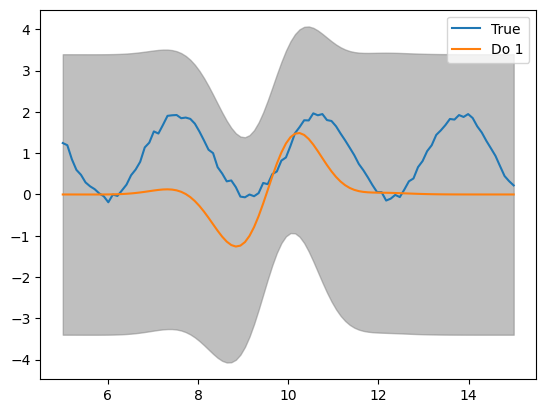

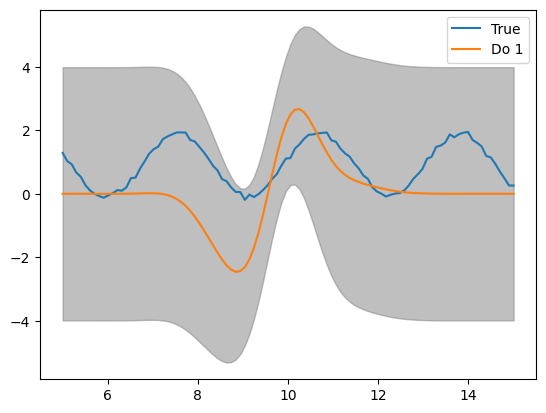

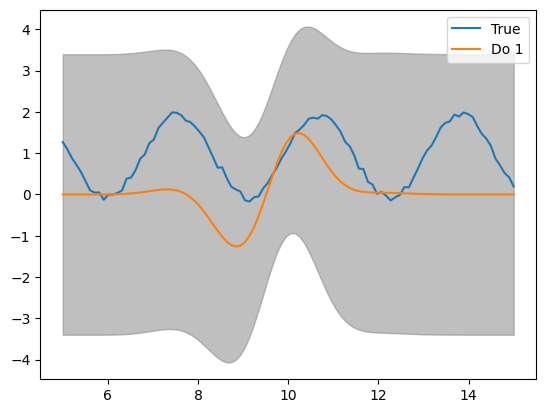

In [9]:
# will check things on an individual level to make sure the results are right
import numpy as np
import matplotlib.pyplot as plt
from utils.sem_sampling import sample_model
true_vals = np.zeros(shape=100)
predictions = np.zeros(shape=100)
var = np.zeros(shape=100)
t_vals = np.linspace(start=-8, stop=8, num=100)
graph = Graph5Nodes()

edges = [
            [
                ("B", "L"),
                ("B", "Y"),
                ("T", "L"),
                ("T", "R"),
                ("T", "Y"),
                ("L", "R"),
                ("R", "Y"),
            ],
            [
                ("B", "L"),
                # ("B", "Y"),
                ("T", "L"),
                ("T", "R"),
                ("T", "Y"),
                ("L", "R"),
                ("R", "Y"),
            ],
            graph.edges
        ]
model = CEO(graph_type="Graph5", all_graph_edges=edges)
# print("------FITTING THE SAMPLES TO THE GRAPHS--------")
model.fit_samples_to_graphs()
# print("------CALCULATING THE DO STATISTICS--------")
model.calculate_do_statistics()

es = model.exploration_set[0]
# print(model.exploration_set[0])
model.do_function_graph(es, edge_num=0)
model.do_function_graph(es, edge_num=1)
model.do_function_graph(es, edge_num=2)


In [ ]:
model.run_algorithm(T=3)


7.395043975025951
11.874037727833546


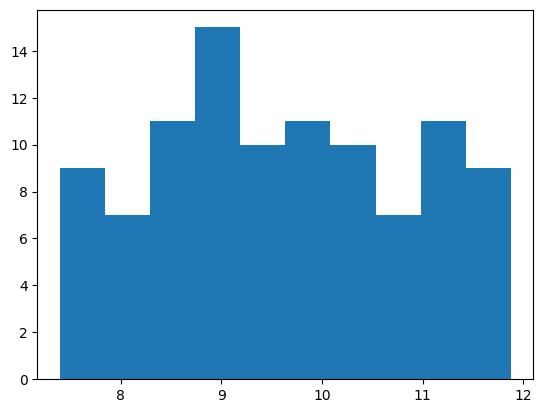

In [7]:
# checking the graph values
print(model.D_O["R"].min())
print(model.D_O["R"].max())
plt.hist(model.D_O['R'])
plt.show()

In [8]:
model.variables

['B', 'T', 'L', 'R', 'Y']